# ANN model testing

In [1]:
from gwsnr import GWSNR

## How to call ANN model?

In [2]:
# This step also save the ann model in 'ann_data' directory
mysnr = GWSNR(snr_type='ann', waveform_approximant='IMRPhenomXPHM')

psds not given. Choosing bilby's default psds
You have chosen default ANN model. This model only works for gwsnr default parameters.
ANN model will be save and loaded from 'ann_data' directory. To create new model, follow instructions from the 'gwsnr' documentation.
Please be patient while the interpolator is generated for partialscaledSNR.
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_1.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_1.pickle

Chosen GWSNR initialization parameters:

npool:  4
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpam

In [3]:
# calling ANN model with path to the model and scaler
mysnr = GWSNR(snr_type='ann', waveform_approximant='IMRPhenomXPHM', ifos=['L1', 'H1'], ann_path_dict=dict(
    L1=["ann_data/ann_model_L1_O4.h5", "ann_data/scaler_L1_O4.pkl"], 
    H1=["ann_data/ann_model_H1_O4.h5", "ann_data/scaler_H1_O4.pkl"]
    )
)

Please be patient while the interpolator is generated for partialscaledSNR.
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_1.pickle

Chosen GWSNR initialization parameters:

npool:  4
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1', 'H1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt')]


In [4]:
# set the GW parameters
import numpy as np

mass_1 = np.array([5, 10.,50.,200.])
ratio = np.array([1, 0.8,0.5,0.2])
luminosity_distance = np.array([1000, 2000, 3000, 4000])
a_1 = np.array([0.1, 0.2, 0.3, 0.4])
a_2 = np.array([0.1, 0.2, 0.3, 0.4])
tilt_1 = np.array([0.1, 0.2, 0.3, 0.4])
tilt_2 = np.array([0.1, 0.2, 0.3, 0.4])
phi_12 = np.array([0.1, 0.2, 0.3, 0.4])
phi_jl = np.array([0.1, 0.2, 0.3, 0.4])

# looking at the SNRs 
snr_ann = mysnr.snr_with_ann(mass_1=mass_1, mass_2=mass_1*ratio, luminosity_distance=luminosity_distance, a_1=a_1, a_2=a_2, tilt_1=tilt_1, tilt_2=tilt_2, phi_12=phi_12, phi_jl=phi_jl)
print("snr_ann=", snr_ann["optimal_snr_net"])

# looking at the inner product SNRs
snr_bilby = mysnr.compute_bilby_snr(mass_1=mass_1, mass_2=mass_1*ratio, luminosity_distance=luminosity_distance, a_1=a_1, a_2=a_2, tilt_1=tilt_1, tilt_2=tilt_2, phi_12=phi_12, phi_jl=phi_jl)
print("snr_bilby=", snr_bilby["optimal_snr_net"])

/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


snr_ann= [ 8.04942466  6.67040973 13.3803042   0.        ]


/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.20s/it]

snr_bilby= [ 8.8864286   7.1061227  13.82516844  0.        ]


## ANN SNR with simulated events

In [5]:
# generating new data
from ler.rates import LeR
from ler.utils import load_json
ler = LeR(verbose=False, snr_type='inner_product',waveform_approximant="IMRPhenomXPHM", spin_zero=False, spin_precession=True)

In [6]:
## Uncomment to generate new data if not already generated
# size = 50000
# ler.unlensed_cbc_statistics(size=size);

In [7]:
unlensed_params = load_json("ler_data/unlensed_param.json")

In [8]:
unlensed_params.keys()

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'A1', 'optimal_snr_net'])

In [170]:
mysnr = GWSNR(snr_type='ann', waveform_approximant='IMRPhenomXPHM')

psds not given. Choosing bilby's default psds
You have chosen default ANN model. This model only works for gwsnr default parameters.
ANN model will be save and loaded from 'ann_data' directory. To create new model, follow instructions from the 'gwsnr' documentation.
Please be patient while the interpolator is generated for partialscaledSNR.
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_1.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_1.pickle

Chosen GWSNR initialization parameters:

npool:  4
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpam

In [171]:
# since I have initialized the GWSNR with ann, I can use the snr calculator attribute
snr_ann = mysnr.snr(gw_param_dict=unlensed_params)
y_pred = snr_ann["optimal_snr_net"]

In [172]:
import numpy as np
y_test = np.array(unlensed_params["optimal_snr_net"])

In [173]:
#y_pred = (y_pred > 0.5)
idx = (y_test>4) & (y_pred<12)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[idx][10:25])

[[7.46213177 7.87638468]
 [4.03365765 4.1337412 ]
 [5.67737589 5.75722924]
 [4.01018016 4.16869439]
 [5.11765596 5.44286642]
 [4.36348863 4.48120252]
 [4.83514751 4.80380386]
 [4.84640989 4.87048237]
 [4.02808384 4.18957226]
 [4.02084864 4.33679245]
 [8.37504226 8.04003354]
 [6.63316513 6.01579406]
 [5.88570852 5.45421404]
 [5.06429647 4.77069656]
 [4.37253951 4.47501782]]


In [174]:
# for astrophysical sources
# but this accuracy can be misleading
# most of the sources are at low SNR
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix((y_test>8), (y_pred>8))
print(cm)
accuracy_score((y_test>8), (y_pred>8))

[[49754    20]
 [   18   208]]


0.99924

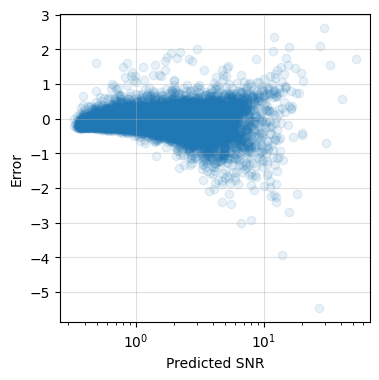

In [175]:
# looking correlation between error and snr
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(y_pred, y_test-y_pred, alpha=0.1)
plt.xlabel("Predicted SNR")
plt.xscale("log")
plt.ylabel("Error")
plt.grid(alpha=0.4)
plt.show()

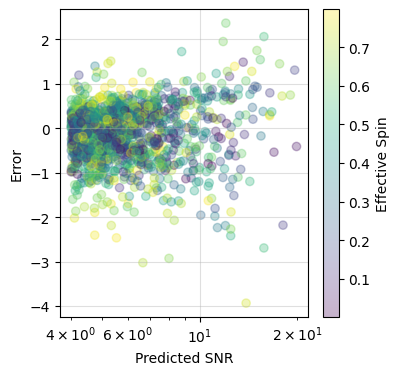

In [176]:
# contour plot
# x = y_pred, y = chi_eff, z = error
mass_1 = np.array(unlensed_params["mass_1"])
mass_2 = np.array(unlensed_params["mass_2"])
a_1 = np.array(unlensed_params["a_1"])
a_2 = np.array(unlensed_params["a_2"])
tilt_1 = np.array(unlensed_params["tilt_1"])
tilt_2 = np.array(unlensed_params["tilt_2"])

# effective spin
chi_eff = (mass_1 * a_1 * np.cos(tilt_1) + mass_2 * a_2 * np.cos(tilt_2)) / (mass_1 + mass_2)

idx = (y_pred>4) & (y_pred<20)
plt.figure(figsize=(4,4))
# a = 0.16765671*0.4
# b = 0
# plt.scatter(y_pred[idx], y_test[idx]-(y_pred[idx]-a*y_pred[idx]+b), c=abs(chi_eff[idx]), alpha=0.3)
# plt.scatter(y_pred[idx], y_test[idx]-(y_pred[idx]-0), c=abs(chi_eff[idx]), alpha=0.3)
plt.scatter(y_pred[idx], y_test[idx]-(y_pred[idx]-0), c=abs(a_1[idx]), alpha=0.3)
plt.xlabel("Predicted SNR")
plt.xscale("log")
plt.ylabel("Error")
plt.colorbar(label="Effective Spin")
plt.grid(alpha=0.4)
plt.show()

50000
1397


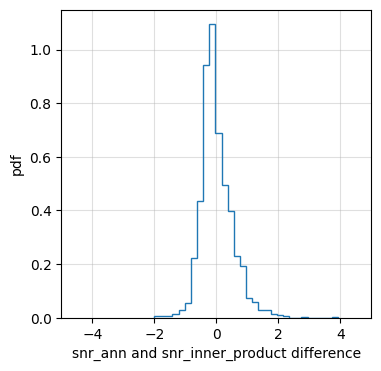

In [180]:
import matplotlib.pyplot as plt

hist_ = y_pred-y_test
print(len(hist_))
idx = (y_test>4) & (y_test<10)
hist_ = hist_[idx]
#hist_ = hist_[abs(hist_)<5.]
print(len(hist_))
plt.figure(figsize=(4,4)) 
plt.hist(hist_, bins=30, histtype='step', density=True)
plt.xlim(-5,5)
plt.xlabel('snr_ann and snr_inner_product difference')
plt.ylabel('pdf')
plt.grid(alpha=0.4)
plt.show()

### Allow error bar of -2.5 to 2.5

In [181]:
# To allow certain error in the SNR
def y_pred_fn(y_pred, y_test, idx, threshold=8, error=2):
    y_pred_ = y_pred.copy()
    y_test_ = y_test.copy()
    idx_ = abs(y_test_-y_pred_)<error
    y_pred_[idx_] = y_test_[idx_]
    
    return (y_pred_>threshold)[idx]

In [189]:
# let's allow a error bar of -2.5 to 2.5
idx = (y_test>4) & (y_test<12)
#idx = np.arange(len(y_test))
cm = confusion_matrix((y_test>8)[idx], y_pred_fn(y_pred, y_test, idx, threshold=8, error=2.5))
print(cm)
accuracy_score((y_test>8)[idx], y_pred_fn(y_pred, y_test, idx, threshold=8, error=2.5))


[[1290    1]
 [   0  160]]


0.9993108201240524

* This is good enough to get the SNR of the signal

## BNS

In [47]:
# generating new data
# for BNS LeR sets spin between -0.05 and 0.05
# So the error will be different
from ler.rates import LeR
ler = LeR(npool=4, event_type = 'BNS', mtot_max=14, z_max = 2.0, verbose=False, snr_type='inner_product', waveform_approximant="IMRPhenomXPHM", spin_zero=False, spin_precession=True)

In [48]:
## Uncomment to generate new data if not already generated
# size = 50000
# unlensed_params = ler.unlensed_cbc_statistics(size=size, output_jsonfile='unlensed_bns_ann_test.json', resume=True)

In [77]:
from gwsnr import GWSNR
mysnr = GWSNR(snr_type='ann', mtot_max=14, waveform_approximant='IMRPhenomXPHM')

psds not given. Choosing bilby's default psds
You have chosen default ANN model. This model only works for gwsnr default parameters.
ANN model will be save and loaded from 'ann_data' directory. To create new model, follow instructions from the 'gwsnr' documentation.
Please be patient while the interpolator is generated for partialscaledSNR.
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_4.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_4.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_4.pickle

Chosen GWSNR initialization parameters:

npool:  4
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 14
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/ana

In [50]:
import numpy as np
from ler.utils import load_json
unlensed_params = load_json("ler_data/unlensed_bns_ann_test.json")
y_test = np.array(unlensed_params["optimal_snr_net"])

# since I have initialized the GWSNR with ann, I can use the snr calculator attribute
snr_ann = mysnr.snr(gw_param_dict=unlensed_params)
y_pred = snr_ann["optimal_snr_net"]

#y_pred = (y_pred > 0.5)
idx = (y_test>4) & (y_pred<12)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[idx][10:25])

[[3.54438761 4.21250224]
 [4.14997507 4.87121279]
 [7.04572879 8.20531037]
 [4.98010123 5.8270551 ]
 [7.20715575 8.33819294]
 [6.16027853 7.23651706]
 [8.46576432 9.89793793]
 [6.45298655 7.49241783]
 [4.10400597 4.83976967]
 [4.61853163 5.44790741]
 [5.51481178 6.48989506]
 [3.67172505 4.2097633 ]
 [5.36304907 6.33800808]
 [3.97159054 4.70775459]
 [5.04049738 5.93784281]]


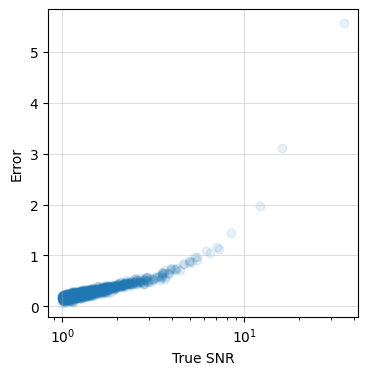

In [53]:
# looking correlation between error and snr
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
idx = (y_pred>1) & (y_pred<100)
plt.scatter(y_pred[idx], (y_test-y_pred)[idx], alpha=0.1)
plt.xlabel("Predicted SNR")
plt.xscale("log")
plt.ylabel("Error")
plt.grid(alpha=0.4)
plt.show()

### let's add a correction factor to the SNR to get the real SNR of the signal

In [63]:
# linear fit to x=y_pred[idx], y=(y_test-y_pred)[idx]
from scipy.optimize import curve_fit
def linear_fn(x, a, b):
    return a*x+b

idx = (y_pred>1) & (y_pred<100)
popt, pcov = curve_fit(linear_fn, y_pred[idx], (y_test-y_pred)[idx])
print(popt)

[0.16765671 0.02430224]


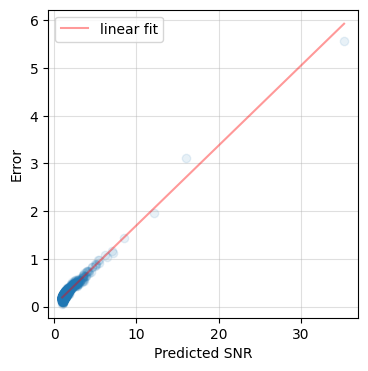

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
idx = (y_pred>1) & (y_pred<100)
plt.scatter(y_pred[idx], (y_test-y_pred)[idx], alpha=0.1)
# plot a*y_pred + b
a = 0.16765671
b = 0.02430224
plt.plot(np.sort(y_pred[idx]), a*np.sort(y_pred[idx])+b, color='red', alpha=0.4, label="linear fit")
plt.xlabel("Predicted SNR")
#plt.xscale("log")
plt.ylabel("Error")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

### let's see after applying the correction factor

In [75]:
# with correction
a = 0.16765671
b = 0.02430224
y_pred_ = y_pred + a*y_pred + b
idx = (y_pred_>1) & (y_pred_<100)

In [69]:
idx = np.arange(len(y_test))
cm = confusion_matrix((y_test>8)[idx], (y_pred_>8)[idx])
print(cm)
accuracy_score((y_test>8)[idx], (y_pred_>8)[idx])

[[49993     0]
 [    1     6]]


0.99998

### Lastly let's plot out the effective spin

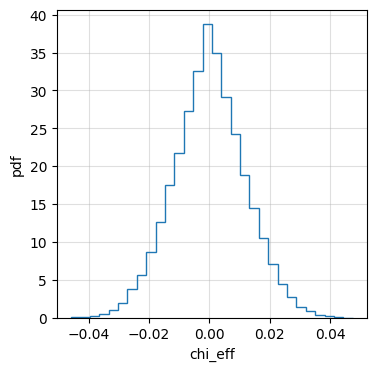

In [79]:
mass_1 = np.array(unlensed_params["mass_1"])
mass_2 = np.array(unlensed_params["mass_2"])
a_1 = np.array(unlensed_params["a_1"])
a_2 = np.array(unlensed_params["a_2"])
tilt_1 = np.array(unlensed_params["tilt_1"])
tilt_2 = np.array(unlensed_params["tilt_2"])

# effective spin
chi_eff = (mass_1 * a_1 * np.cos(tilt_1) + mass_2 * a_2 * np.cos(tilt_2)) / (mass_1 + mass_2)

# hist of chi_eff
plt.figure(figsize=(4,4))
plt.hist(chi_eff, bins=30, histtype='step', density=True)
plt.xlabel("chi_eff")
plt.ylabel("pdf")
plt.grid(alpha=0.4)
plt.show()

## What if I use interpolation and allow an error bar of -2.5 to 2.5?

In [250]:
from ler.rates import LeR
ler = LeR(npool=4, event_type = 'BNS', mtot_max=14, z_max = 0.5, verbose=False, snr_type='interpolation', waveform_approximant="IMRPhenomD", spin_zero=False, spin_precession=True)

In [251]:
## Uncomment to generate new data if not already generated
size = 10000
unlensed_params = ler.unlensed_cbc_statistics(size=size, output_jsonfile='unlensed_bns_ann_test_interpolation.json', resume=False)

unlensed params will be store in ./ler_data/unlensed_bns_ann_test_interpolation.json
chosen batch size = 50000 with total size = 10000
There will be 1 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
saving all unlensed_params in ./ler_data/unlensed_bns_ann_test_interpolation.json...


In [252]:
from gwsnr import GWSNR
mysnr = GWSNR(snr_type='inner_product', mtot_max=14, waveform_approximant='IMRPhenomXPHM', gwsnr_verbose=False)

psds not given. Choosing bilby's default psds


In [253]:
import numpy as np
from ler.utils import load_json
unlensed_params = load_json("ler_data/unlensed_bns_ann_test_interpolation.json")
y_test = np.array(unlensed_params["optimal_snr_net"])

# since I have initialized the GWSNR with ann, I can use the snr calculator attribute
snr_ann = mysnr.snr(gw_param_dict=unlensed_params)
y_pred = snr_ann["optimal_snr_net"]

solving SNR with inner product


100%|█████████████████████████████████████████████████████████| 10000/10000 [04:24<00:00, 37.83it/s]


In [254]:
#y_pred = (y_pred > 0.5)
idx = (y_test>4) & (y_pred<12)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[idx][10:25])

[[6.00782944 6.03006165]
 [6.89953817 6.89750607]
 [4.30771884 4.29753394]
 [5.81305686 5.80716929]
 [4.37901284 4.36720782]
 [3.99789919 4.00722507]
 [4.67340997 4.66183859]
 [4.73092395 4.71966952]
 [4.29333544 4.29629932]
 [6.22609068 6.21968298]
 [4.82382969 4.82671597]
 [4.21886665 4.21517006]
 [4.5192283  4.5468115 ]
 [5.00095036 4.99326779]
 [4.61878888 4.60517084]]


In [255]:
idx = (y_pred>2) & (y_pred<20)
cm = confusion_matrix((y_test>8)[idx], (y_pred>8)[idx])
print(cm)
accuracy_score((y_test>8)[idx], (y_pred>8)[idx])

[[1963    0]
 [   0   28]]


1.0

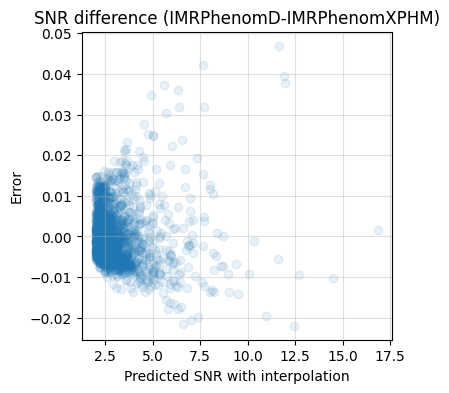

In [256]:
# looking correlation between error and snr
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
idx = (y_pred>2) & (y_pred<20)
plt.scatter(y_pred[idx], (y_test-y_pred)[idx], alpha=0.1)
plt.xlabel("Predicted SNR with interpolation")
#plt.xscale("log")
plt.ylabel("Error")
plt.title("SNR difference (IMRPhenomD-IMRPhenomXPHM)")
plt.grid(alpha=0.4)
plt.show()

* it's not co-related to the SNR 